# Module importation


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score, mean_squared_error, r2_score, accuracy_score,make_scorer, cohen_kappa_score, classification_report, confusion_matrix, roc_curve, auc, f1_score, roc_auc_score, precision_recall_curve
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.metrics import Recall
from sklearn.pipeline import Pipeline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from imblearn.combine import SMOTETomek

# Connexion ; Workpath

In [ ]:
os.listdir()

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


['Group_Project_GroupID.ipynb', 'notebooks', 'data', 'pitch', 'outcome']

# Data preprocessing

## EDA

In [ ]:
df_raw = pd.read_csv('./data/customer_booking.csv', encoding='latin-1')

In [ ]:
df_raw.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [ ]:
df_raw.isnull().sum()

,0
num_passengers,0
sales_channel,0
trip_type,0
purchase_lead,0
length_of_stay,0
flight_hour,0
flight_day,0
route,0
booking_origin,0
wants_extra_baggage,0


In [ ]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [ ]:
df_raw.describe().T

,count,mean,std,min,25%,50%,75%,max
num_passengers,50000.0,1.591240,1.020165,1.00,1.00,1.00,2.00,9.0
purchase_lead,50000.0,84.940480,90.451378,0.00,21.00,51.00,115.00,867.0
length_of_stay,50000.0,23.044560,33.887670,0.00,5.00,17.00,28.00,778.0
flight_hour,50000.0,9.066340,5.412660,0.00,5.00,9.00,13.00,23.0
wants_extra_baggage,50000.0,0.668780,0.470657,0.00,0.00,1.00,1.00,1.0
wants_preferred_seat,50000.0,0.296960,0.456923,0.00,0.00,0.00,1.00,1.0
wants_in_flight_meals,50000.0,0.427140,0.494668,0.00,0.00,0.00,1.00,1.0
flight_duration,50000.0,7.277561,1.496863,4.67,5.62,7.57,8.83,9.5
booking_complete,50000.0,0.149560,0.356643,0.00,0.00,0.00,0.00,1.0


In [ ]:
df_raw.nunique()

,0
num_passengers,9
sales_channel,2
trip_type,3
purchase_lead,470
length_of_stay,335
flight_hour,24
flight_day,7
route,799
booking_origin,104
wants_extra_baggage,2


In [ ]:
# replace days by numbers where Mon = 1
day_mapping = {
    'Mon': 1,
    'Tue': 2,
    'Wed': 3,
    'Thu': 4,
    'Fri': 5,
    'Sat': 6,
    'Sun': 7
}

df_raw['flight_day'].replace(day_mapping, inplace=True)
df_raw['flight_day'].unique()

<ipython-input-47-e2e079d4b403>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_raw['flight_day'].replace(day_mapping, inplace=True)
<ipython-input-47-e2e079d4b403>:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_raw['flight_day'].replace(day_mapping, inplace=True)


array([6, 3, 4, 1, 7, 2, 5])

In [ ]:
# split the route in departure and arrival airport
df_raw['route_dep'] = df_raw['route'].str[:3]
df_raw['route_arr'] = df_raw['route'].str[3:]

# drop the route column
df_raw.drop('route', axis=1, inplace=True)

In [ ]:
# replace (not set) by mode
df_raw.replace('(not set)', df_raw['booking_origin'].mode()[0], inplace=True)
df_raw['booking_origin'].unique()

array(['New Zealand', 'India', 'United Kingdom', 'China', 'South Korea',
       'Japan', 'Malaysia', 'Singapore', 'Switzerland', 'Germany',
       'Indonesia', 'Czech Republic', 'Vietnam', 'Thailand', 'Spain',
       'Romania', 'Ireland', 'Italy', 'Slovakia', 'United Arab Emirates',
       'Tonga', 'R\x82union', 'Australia', 'Saudi Arabia', 'Netherlands',
       'Qatar', 'Hong Kong', 'Philippines', 'Sri Lanka', 'France',
       'Croatia', 'United States', 'Laos', 'Hungary', 'Portugal',
       'Cyprus', 'Cambodia', 'Poland', 'Belgium', 'Oman', 'Bangladesh',
       'Kazakhstan', 'Brazil', 'Turkey', 'Kenya', 'Taiwan', 'Brunei',
       'Chile', 'Bulgaria', 'Ukraine', 'Denmark', 'Colombia', 'Iran',
       'Bahrain', 'Solomon Islands', 'Slovenia', 'Mauritius', 'Nepal',
       'Russia', 'Kuwait', 'Mexico', 'Sweden', 'Austria', 'Lebanon',
       'Jordan', 'Greece', 'Mongolia', 'Canada', 'Tanzania', 'Peru',
       'Timor-Leste', 'Argentina', 'New Caledonia', 'Macau',
       'Myanmar (Burma)', '

In [ ]:
for col in df_raw.columns:
  if df_raw[col].dtype == 'object':
    print(f'Valeurs uniques pour la colonne {col}: {df_raw[col].unique()}')

Valeurs uniques pour la colonne sales_channel: ['Internet' 'Mobile']
Valeurs uniques pour la colonne trip_type: ['RoundTrip' 'CircleTrip' 'OneWay']
Valeurs uniques pour la colonne booking_origin: ['New Zealand' 'India' 'United Kingdom' 'China' 'South Korea' 'Japan'
 'Malaysia' 'Singapore' 'Switzerland' 'Germany' 'Indonesia'
 'Czech Republic' 'Vietnam' 'Thailand' 'Spain' 'Romania' 'Ireland' 'Italy'
 'Slovakia' 'United Arab Emirates' 'Tonga' 'R\x82union' 'Australia'
 'Saudi Arabia' 'Netherlands' 'Qatar' 'Hong Kong' 'Philippines'
 'Sri Lanka' 'France' 'Croatia' 'United States' 'Laos' 'Hungary'
 'Portugal' 'Cyprus' 'Cambodia' 'Poland' 'Belgium' 'Oman' 'Bangladesh'
 'Kazakhstan' 'Brazil' 'Turkey' 'Kenya' 'Taiwan' 'Brunei' 'Chile'
 'Bulgaria' 'Ukraine' 'Denmark' 'Colombia' 'Iran' 'Bahrain'
 'Solomon Islands' 'Slovenia' 'Mauritius' 'Nepal' 'Russia' 'Kuwait'
 'Mexico' 'Sweden' 'Austria' 'Lebanon' 'Jordan' 'Greece' 'Mongolia'
 'Canada' 'Tanzania' 'Peru' 'Timor-Leste' 'Argentina' 'New Caledonia'

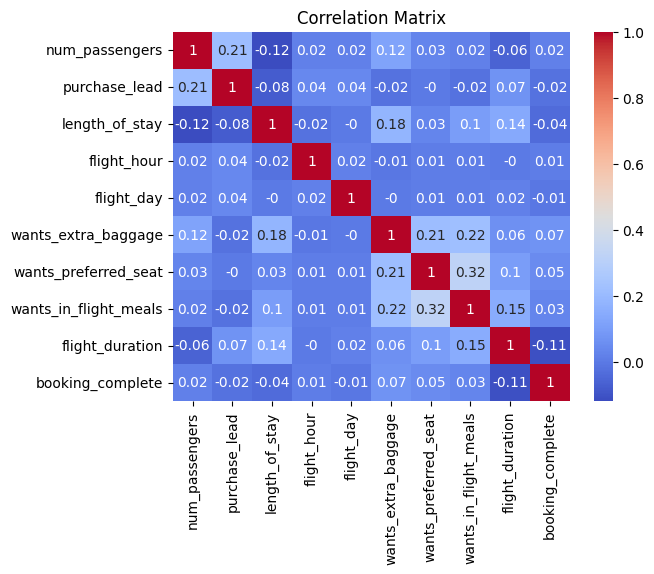

In [ ]:
# correlation matrix
corr_matrix = df_raw.select_dtypes(include=np.number).corr()
sns.heatmap(round(corr_matrix, 2), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  int64  
 7   booking_origin         50000 non-null  object 
 8   wants_extra_baggage    50000 non-null  int64  
 9   wants_preferred_seat   50000 non-null  int64  
 10  wants_in_flight_meals  50000 non-null  int64  
 11  flight_duration        50000 non-null  float64
 12  booking_complete       50000 non-null  int64  
 13  route_dep              50000 non-null  object 
 14  route_arr              50000 non-null  object 
dtypes:

In [ ]:
df_raw['booking_complete'].value_counts(normalize=True)

,proportion
booking_complete,
0,0.85044
1,0.14956


## Contingency tables

In [ ]:
for col in df_raw.columns:
  if df_raw[col].nunique() == 2 and col != 'booking_complete':
    contingency_table = pd.crosstab(df_raw[col], df_raw['booking_complete'], normalize=True)
    print(f"Contingency table for {col}:")
    print(contingency_table)
    print("\n")

Contingency table for sales_channel:
booking_complete        0        1
sales_channel                     
Internet          0.75026  0.13738
Mobile            0.10018  0.01218


Contingency table for wants_extra_baggage:
booking_complete           0        1
wants_extra_baggage                  
0                    0.29312  0.03810
1                    0.55732  0.11146


Contingency table for wants_preferred_seat:
booking_complete            0        1
wants_preferred_seat                  
0                     0.60606  0.09698
1                     0.24438  0.05258


Contingency table for wants_in_flight_meals:
booking_complete             0        1
wants_in_flight_meals                  
0                      0.49186  0.08100
1                      0.35858  0.06856




## Standardization and Encoding

In [ ]:
# Select numerical features, excluding binary columns
numerical_cols = df_raw.select_dtypes(include=np.number)

# Get a boolean mask for binary columns, applied per column
binary_mask = (numerical_cols.nunique() == 2)

# Filter for non-binary numerical columns using the mask
non_binary_cols = numerical_cols.loc[:, ~binary_mask].columns

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the non-binary numerical columns
df_raw[non_binary_cols] = scaler.fit_transform(df_raw[non_binary_cols])

df_raw.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,route_dep,route_arr
0,0.400684,Internet,RoundTrip,1.957530,-0.119353,-0.381764,1.096754,New Zealand,1,0,0,-1.174175,0,AKL,DEL
1,-0.579559,Internet,RoundTrip,0.299164,-0.089844,-1.120780,1.096754,New Zealand,0,0,0,-1.174175,0,AKL,DEL
2,0.400684,Internet,RoundTrip,1.747470,-0.030824,1.465775,-0.408687,India,1,1,0,-1.174175,0,AKL,DEL
3,-0.579559,Internet,RoundTrip,0.122272,0.234761,-0.936026,1.096754,New Zealand,0,0,1,-1.174175,0,AKL,DEL
4,0.400684,Internet,RoundTrip,-0.187290,-0.030824,1.096267,-0.408687,India,1,0,1,-1.174175,0,AKL,DEL


In [ ]:
# Numerization of categorical variables
le = LabelEncoder()
cat = df_raw.select_dtypes(include='object').columns
df_enc = df_raw.copy()

# Fit and transform the categorical columns
for col in cat:
  df_enc[col] = le.fit_transform(df_raw[col])

In [ ]:
df_enc.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,route_dep,route_arr
0,0.400684,0,2,1.957530,-0.119353,-0.381764,1.096754,60,1,0,0,-1.174175,0,0,4
1,-0.579559,0,2,0.299164,-0.089844,-1.120780,1.096754,60,0,0,0,-1.174175,0,0,4
2,0.400684,0,2,1.747470,-0.030824,1.465775,-0.408687,35,1,1,0,-1.174175,0,0,4
3,-0.579559,0,2,0.122272,0.234761,-0.936026,1.096754,60,0,0,1,-1.174175,0,0,4
4,0.400684,0,2,-0.187290,-0.030824,1.096267,-0.408687,35,1,0,1,-1.174175,0,0,4


# Unsupervised learning

## Elbow Method

In [ ]:
features = ['flight_duration', 'purchase_lead', 'length_of_stay', 'flight_hour']
X = df_enc[features]
# look at outliers
(X["purchase_lead"]).max()

8.646273355291079

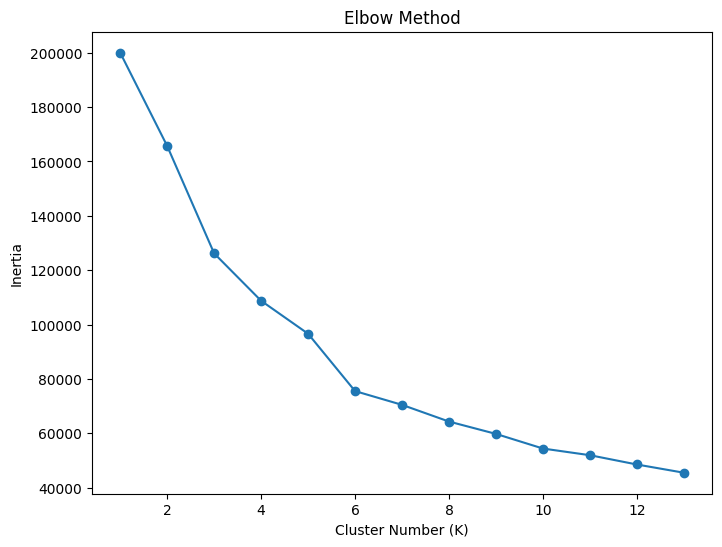

In [ ]:
inertia = []
K_range = range(1, 14)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Cluster Number (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

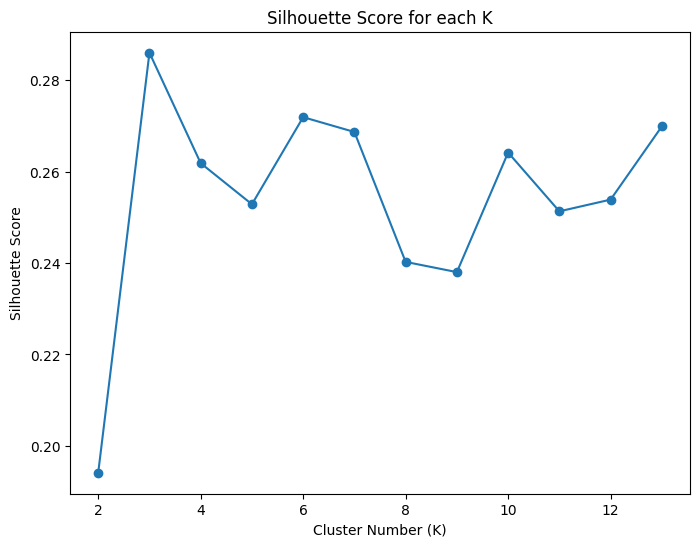

In [ ]:
silhouette_avg = []
K_range = range(2, 14)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    silhouette_avg.append(silhouette_score(X, cluster_labels))

plt.figure(figsize=(8, 6))
plt.plot(K_range, silhouette_avg, marker='o')
plt.xlabel('Cluster Number (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for each K')
plt.show()

## Silhouette score

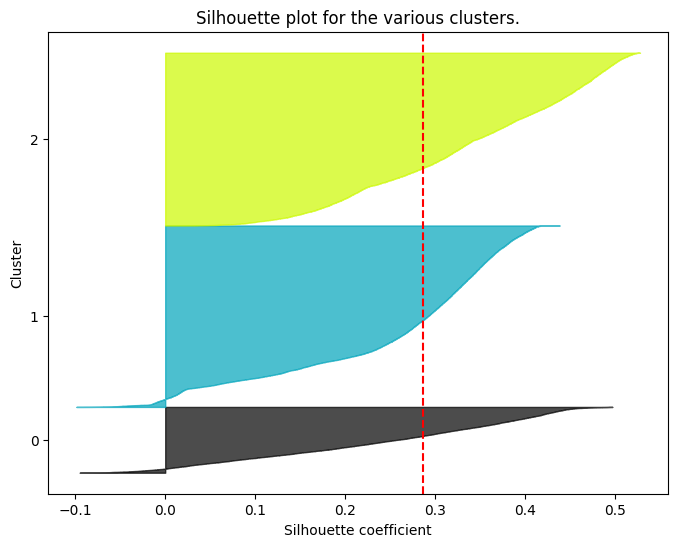

In [ ]:
# 1. Perform Clustering (e.g., KMeans)
k = 3 # try with 5 clusters
kmeans = KMeans(n_clusters=k,
           init = 'k-means++',
           n_init = 10,
           max_iter = 300,
           random_state = 0,
)
cluster_labels = kmeans.fit_predict(X)

# 2. Calculate Silhouette Values
silhouette_vals = silhouette_samples(X, cluster_labels)

# 3. Create Silhouette Visual
cluster_labels_unique = np.unique(cluster_labels)
n_clusters = cluster_labels_unique.shape[0]

y_ax_lower, y_ax_upper = 0, 0
yticks = []

fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(8, 6)

for i, c in enumerate(cluster_labels_unique):
    c_silhouette_vals = silhouette_vals[cluster_labels == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = plt.cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(np.arange(y_ax_lower, y_ax_upper),
                      0, c_silhouette_vals,
                      facecolor=color, edgecolor=color, alpha=0.7)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)

ax1.axvline(x=silhouette_score(X, cluster_labels), color="red", linestyle="--")

ax1.set_yticks(yticks)
ax1.set_yticklabels(cluster_labels_unique)
ax1.set_ylabel("Cluster")
ax1.set_xlabel("Silhouette coefficient")
ax1.set_title("Silhouette plot for the various clusters.")

plt.show()

## PCA

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


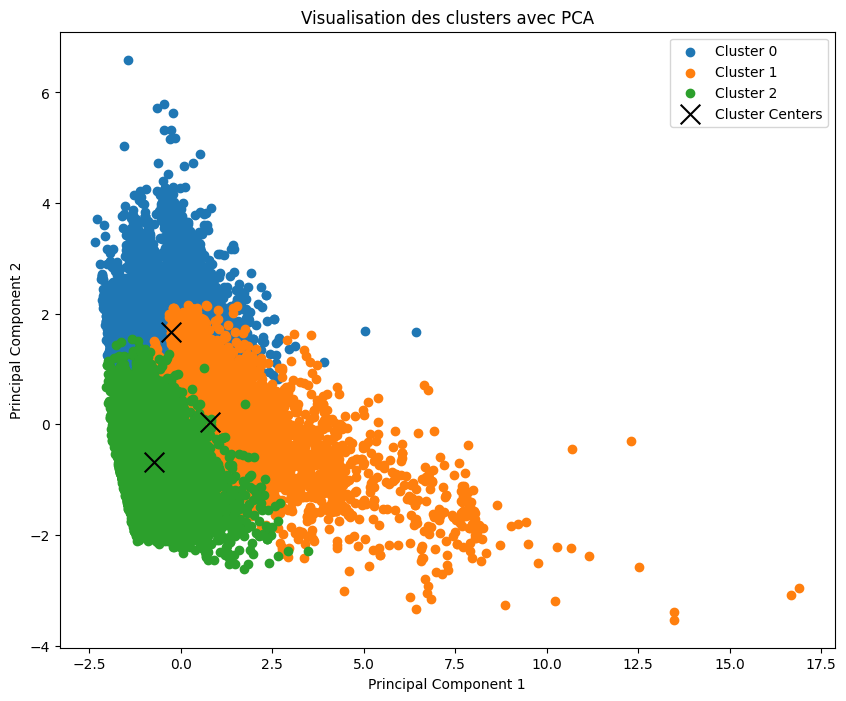

In [ ]:
# Perform PCA with 2 components
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)

# Create a DataFrame with the principal components
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Add the cluster labels to the DataFrame
principal_df['cluster'] = cluster_labels

# Visualize the clusters
plt.figure(figsize=(10, 8))
for cluster in range(k):
    plt.scatter(principal_df[principal_df['cluster'] == cluster]['PC1'],
                principal_df[principal_df['cluster'] == cluster]['PC2'],
                label=f'Cluster {cluster}')

# Plot the cluster centers
cluster_centers = pca.transform(kmeans.cluster_centers_)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', s=200, color='black', label='Cluster Centers')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Visualisation des clusters avec PCA')
plt.legend()
plt.show()


## Distribution in each cluster

In [ ]:
# créer une colonne avec les labels de chaque point
df_clust = df_enc.copy()
df_clust['clusters'] = cluster_labels

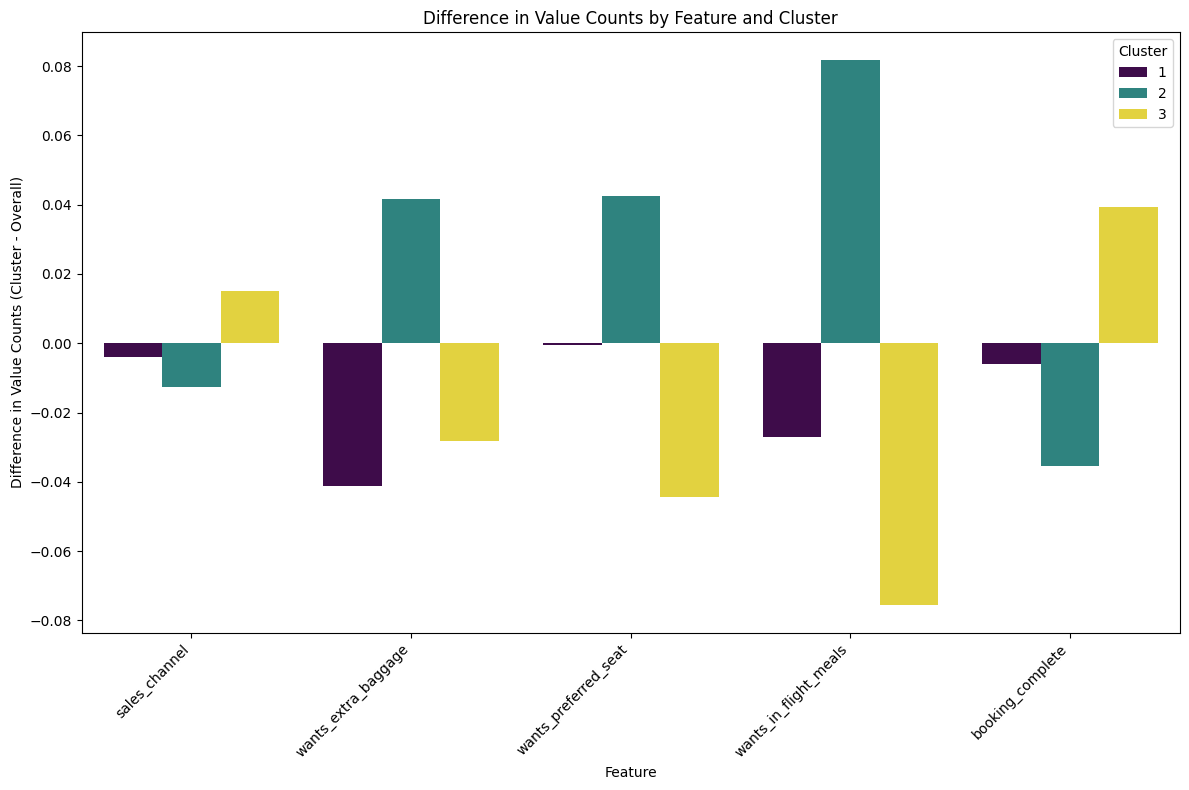

In [ ]:
# Get the binary columns
binary_cols = [col for col in df_clust.columns if df_clust[col].nunique() == 2]

# Create an empty dictionary to store the data
cluster_booking_diffs = {}

# Iterate over binary columns and clusters to calculate differences
for bin_col in binary_cols:
    cluster_booking_diffs[bin_col] = {}
    overall_counts = df_clust[bin_col].value_counts(normalize=True)
    for cluster in cluster_labels_unique:
        cluster_counts = df_clust[df_clust['clusters'] == cluster][bin_col].value_counts(normalize=True)
        try:
            diff = cluster_counts.loc[1] - overall_counts.loc[1]
        except KeyError:
            diff = 0
        cluster_booking_diffs[bin_col][cluster+1] = diff

# Create a DataFrame from the dictionary
booking_diff_df = pd.DataFrame(cluster_booking_diffs)

# Transpose the DataFrame for easier plotting
booking_diff_df = booking_diff_df.T

# Reset the index so that we can melt the DataFrame for Seaborn
booking_diff_df = booking_diff_df.reset_index().melt(id_vars='index', var_name='Cluster', value_name='Difference')

# Rename the 'index' column to 'Feature'
booking_diff_df.rename(columns={'index': 'Feature'}, inplace=True)

# Create the grouped bar plot using Seaborn
plt.figure(figsize=(12, 8))  # Adjust figure size as needed

# Plot the data with column names on the x-axis and bars for each cluster
sns.barplot(x='Feature', y='Difference', hue='Cluster', data=booking_diff_df, palette='viridis')

plt.title('Difference in Value Counts by Feature and Cluster')
plt.xlabel('Feature')
plt.ylabel('Difference in Value Counts (Cluster - Overall)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


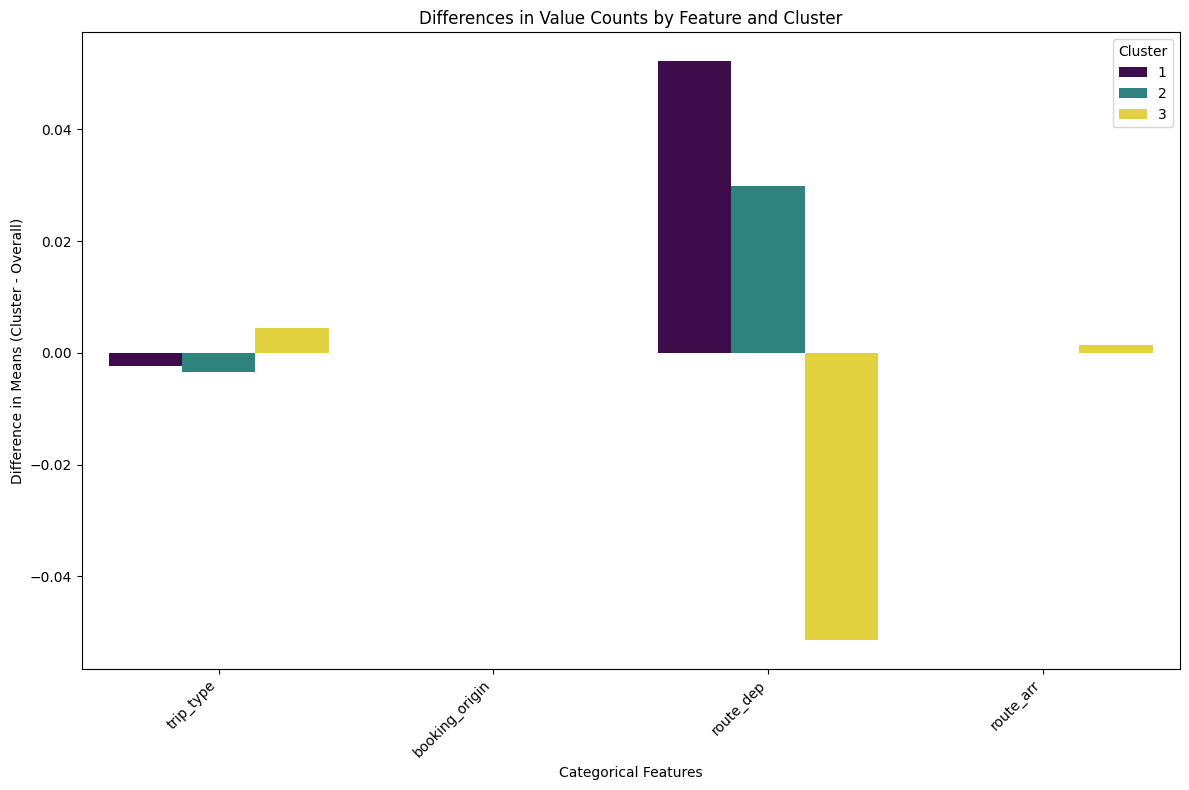

In [ ]:
# Identifier les colonnes catégorielles (non-binaires)
categorical_cols = [col for col in df_raw.columns if df_raw[col].dtype == 'object' and df_raw[col].nunique() > 2]

# Créer un dictionnaire vide pour stocker les différences
cluster_categorical_diffs = {}

# Boucle pour calculer les différences pour chaque colonne catégorielle
for cat_col in categorical_cols:
    cluster_categorical_diffs[cat_col] = {}
    # Calculer la distribution globale
    overall_counts = df_clust[cat_col].value_counts(normalize=True)
    for cluster in cluster_labels_unique:
        # Calculer la distribution pour chaque cluster
        cluster_counts = df_clust[df_clust['clusters'] == cluster][cat_col].value_counts(normalize=True)
        # Calculer la différence entre les distributions de chaque modalité
        cluster_categorical_diffs[cat_col][cluster+1] = cluster_counts - overall_counts

# Convertir le dictionnaire en DataFrame
categorical_diff_df = pd.DataFrame(cluster_categorical_diffs)

# Transposer le DataFrame pour faciliter l'analyse
categorical_diff_df = categorical_diff_df.T

# Réinitialiser l'index pour un formatage propre
categorical_diff_df = categorical_diff_df.reset_index().melt(id_vars='index', var_name='Cluster', value_name='Difference')

# Renommer la colonne 'index' en 'Feature'
categorical_diff_df.rename(columns={'index': 'Feature'}, inplace=True)

# **SOLUTION:** Extract numerical values from 'Difference'
categorical_diff_df['Difference'] = categorical_diff_df['Difference'].apply(lambda x: x.values[0] if isinstance(x, pd.Series) and len(x) > 0 else np.nan)

# Convert 'Difference' column to numeric to allow seaborn plotting
categorical_diff_df['Difference'] = pd.to_numeric(categorical_diff_df['Difference'])

# Créer un plot groupé pour visualiser les différences par cluster
plt.figure(figsize=(12, 8))

# Créer un barplot avec les variables catégorielles sur l'axe x et les différences sur l'axe y
sns.barplot(x='Feature', y='Difference', hue='Cluster', data=categorical_diff_df, palette='viridis')

plt.title("Differences in Value Counts by Feature and Cluster")
plt.xlabel("Categorical Features")
plt.ylabel("Difference in Means (Cluster - Overall)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

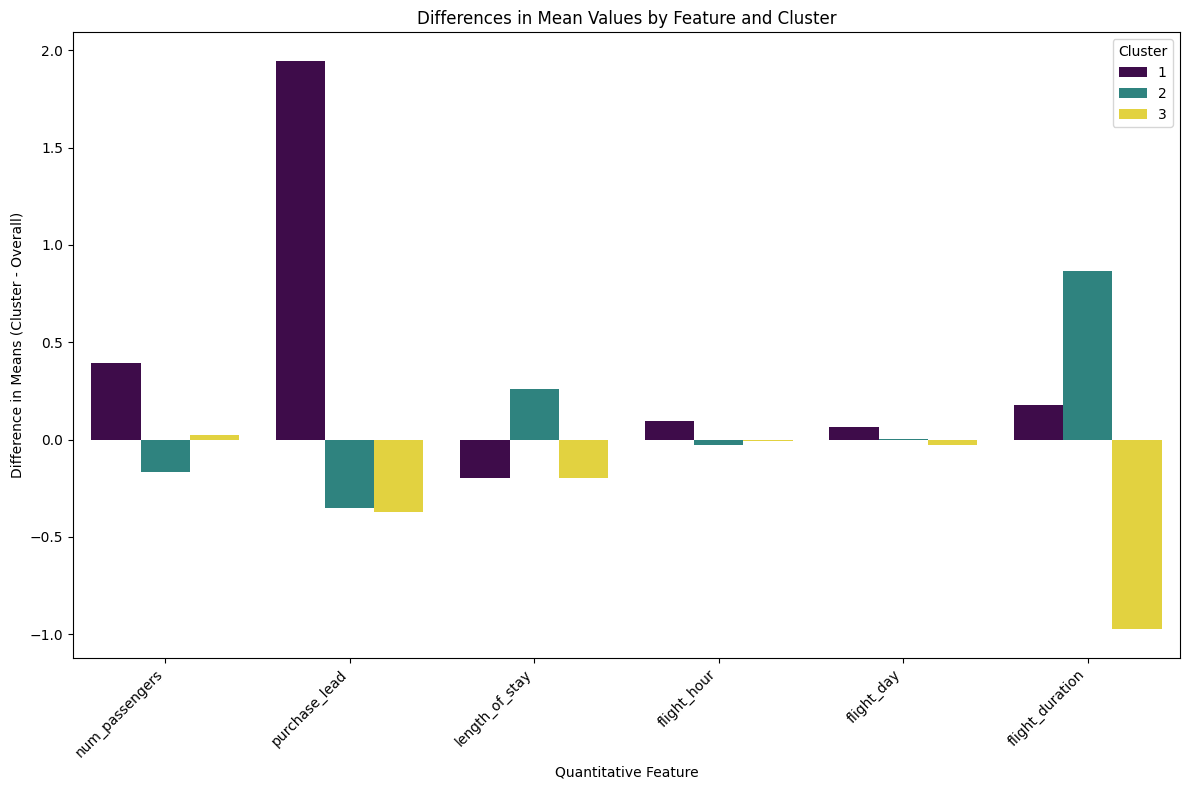

In [ ]:
# Identify quantitative features (excluding binary)
quantitative_cols = [
    col
    for col in df_raw.columns
    if df_raw[col].dtype in ["int64", "float64"] and df_raw[col].nunique() > 2
]

# Create a dictionary to store the differences
cluster_quantitative_diffs = {}

# Calculate differences for each quantitative feature
for quant_col in quantitative_cols:
    cluster_quantitative_diffs[quant_col] = {}
    # Calculate the overall mean
    overall_mean = df_clust[quant_col].mean()
    for cluster in cluster_labels_unique:
        # Calculate the mean for each cluster
        cluster_mean = df_clust[df_clust["clusters"] == cluster][quant_col].mean()
        # Calculate the difference between cluster mean and overall mean
        cluster_quantitative_diffs[quant_col][cluster+1] = cluster_mean - overall_mean

# Convert the dictionary to a DataFrame
quantitative_diff_df = pd.DataFrame(cluster_quantitative_diffs)

# Transpose the DataFrame
quantitative_diff_df = quantitative_diff_df.T

# Reset the index
quantitative_diff_df = quantitative_diff_df.reset_index().melt(
    id_vars="index", var_name="Cluster", value_name="Difference"
)

# Rename the 'index' column to 'Feature'
quantitative_diff_df.rename(columns={"index": "Feature"}, inplace=True)

# Create the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(
    x="Feature", y="Difference", hue="Cluster", data=quantitative_diff_df, palette="viridis"
)

plt.title("Differences in Mean Values by Feature and Cluster")
plt.xlabel("Quantitative Feature")
plt.ylabel("Difference in Means (Cluster - Overall)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Supervised learning

## Data split

In [ ]:
# Moving target colomn to the extreme right
cols = list(df_clust.columns)
cols.remove('booking_complete')
cols.append('booking_complete')
df_clust = df_clust[cols]
df_clust.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,route_dep,route_arr,clusters,booking_complete
0,0.400684,0,2,1.957530,-0.119353,-0.381764,1.096754,60,1,0,0,-1.174175,0,4,0,0
1,-0.579559,0,2,0.299164,-0.089844,-1.120780,1.096754,60,0,0,0,-1.174175,0,4,2,0
2,0.400684,0,2,1.747470,-0.030824,1.465775,-0.408687,35,1,1,0,-1.174175,0,4,0,0
3,-0.579559,0,2,0.122272,0.234761,-0.936026,1.096754,60,0,0,1,-1.174175,0,4,2,0
4,0.400684,0,2,-0.187290,-0.030824,1.096267,-0.408687,35,1,0,1,-1.174175,0,4,2,0


In [ ]:
# Split the data into training, validation, and test sets
X = df_clust.drop('booking_complete', axis=1)
y = df_clust['booking_complete']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.5, random_state=42)

print(f"Training data shape: {X_train.shape}, {y_train.shape}")
print(f"Test data shape: {X_test.shape}, {y_test.shape}")
print(f"Validation data shape: {X_val.shape}, {y_val.shape}")

Training data shape: (17500, 15), (17500,)
Test data shape: (15000, 15), (15000,)
Validation data shape: (17500, 15), (17500,)


## Classic models

In [ ]:
# Initialisation des modèles
xgb_model = XGBClassifier(random_state=42)
rfc_model = RandomForestClassifier(random_state=42)
knn_model = KNeighborsClassifier()

# Entraînement des modèles
xgb_model.fit(X_train, y_train)
rfc_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)

# Prédiction des modèles
xgb_pred_val = xgb_model.predict(X_val)
rfc_pred_val = rfc_model.predict(X_val)
knn_pred_val = knn_model.predict(X_val)

# Afficher
print("XGBoost Validation Accuracy:", accuracy_score(y_val, xgb_pred_val))
print("Random Forest Validation Accuracy:", accuracy_score(y_val, rfc_pred_val))
print("KNN Validation Accuracy:", accuracy_score(y_val, knn_pred_val))

XGBoost Validation Accuracy: 0.8422285714285714
Random Forest Validation Accuracy: 0.8501714285714286
KNN Validation Accuracy: 0.8291428571428572


In [ ]:
# Standardize data (important for KNN)
scaler = StandardScaler()

# Define parameter grids for each model
xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'scale_pos_weight': [1, 5, 10, 15]  # Handling class imbalance
}

rfc_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],  # Reduced to lower values to capture complexity
}

knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan'],
}

# Define StratifiedKFold for cross-validation
skf = StratifiedKFold(n_splits=3)

# XGBoost model without scaling (not necessary for XGBoost)
xgb_grid = GridSearchCV(estimator=XGBClassifier(), param_grid=xgb_param_grid, scoring='roc_auc', cv=skf)

# Random Forest model (does not require scaling either)
rfc_grid = GridSearchCV(estimator=RandomForestClassifier(class_weight='balanced'), param_grid=rfc_param_grid, scoring='roc_auc', cv=skf)

# KNN model wrapped with a pipeline for scaling
knn_pipeline = Pipeline([
    ('scaler', scaler),
    ('knn', KNeighborsClassifier())
])
knn_grid = GridSearchCV(estimator=knn_pipeline, param_grid={'knn__' + key: knn_param_grid[key] for key in knn_param_grid}, scoring='roc_auc', cv=skf)

# Fit the GridSearchCV objects to the training data
xgb_grid.fit(X_train, y_train)
rfc_grid.fit(X_train, y_train)
knn_grid.fit(X_train, y_train)

# Print the best parameters and scores for each model
print("XGBoost Best Parameters:", xgb_grid.best_params_)
print("XGBoost Best ROC-AUC:", xgb_grid.best_score_)

print("Random Forest Best Parameters:", rfc_grid.best_params_)
print("Random Forest Best ROC-AUC:", rfc_grid.best_score_)

print("KNN Best Parameters:", knn_grid.best_params_)
print("KNN Best ROC-AUC:", knn_grid.best_score_)

# Evaluate the best models on the validation set
xgb_best_model = xgb_grid.best_estimator_
rfc_best_model = rfc_grid.best_estimator_
knn_best_model = knn_grid.best_estimator_

# Evaluate on validation set using multiple metrics
xgb_best_pred_val = xgb_best_model.predict(X_val)
rfc_best_pred_val = rfc_best_model.predict(X_val)
knn_best_pred_val = knn_best_model.predict(X_val)

# XGBoost evaluation
print("XGBoost Validation Accuracy:", accuracy_score(y_val, xgb_best_pred_val))
print("XGBoost F1 Score:", f1_score(y_val, xgb_best_pred_val))
print("XGBoost ROC-AUC:", roc_auc_score(y_val, xgb_best_model.predict_proba(X_val)[:, 1]))
print("XGBoost Classification Report:\n", classification_report(y_val, xgb_best_pred_val))

# Random Forest evaluation
print("Random Forest Validation Accuracy:", accuracy_score(y_val, rfc_best_pred_val))
print("Random Forest F1 Score:", f1_score(y_val, rfc_best_pred_val))
print("Random Forest ROC-AUC:", roc_auc_score(y_val, rfc_best_model.predict_proba(X_val)[:, 1]))
print("Random Forest Classification Report:\n", classification_report(y_val, rfc_best_pred_val))

# KNN evaluation
print("KNN Validation Accuracy:", accuracy_score(y_val, knn_best_pred_val))
print("KNN F1 Score:", f1_score(y_val, knn_best_pred_val))
print("KNN ROC-AUC:", roc_auc_score(y_val, knn_best_model.predict_proba(X_val)[:, 1]))
print("KNN Classification Report:\n", classification_report(y_val, knn_best_pred_val))

XGBoost Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'scale_pos_weight': 1}
XGBoost Best ROC-AUC: 0.7670558880903758
Random Forest Best Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
Random Forest Best ROC-AUC: 0.7562262996240738
KNN Best Parameters: {'knn__metric': 'manhattan', 'knn__n_neighbors': 11, 'knn__weights': 'distance'}
KNN Best ROC-AUC: 0.6763045393597557
XGBoost Validation Accuracy: 0.8495428571428572
XGBoost F1 Score: 0.10776008132836326
XGBoost ROC-AUC: 0.776166228990925
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92     14870
           1       0.50      0.06      0.11      2630

    accuracy                           0.85     17500
   macro avg       0.68      0.52      0.51     17500
weighted avg       0.80      0.85      0.80     17500

Random Forest Validation Accuracy: 0.7427428571428571
Random Forest F1 Score: 0.42678889737

Classification Report for XGBoost (Test):
               precision    recall  f1-score   support

           0       0.86      0.99      0.92     14870
           1       0.50      0.06      0.11      2630

    accuracy                           0.85     17500
   macro avg       0.68      0.52      0.51     17500
weighted avg       0.80      0.85      0.80     17500

Classification Report for RFC (Test):
               precision    recall  f1-score   support

           0       0.92      0.76      0.83     14870
           1       0.32      0.64      0.43      2630

    accuracy                           0.74     17500
   macro avg       0.62      0.70      0.63     17500
weighted avg       0.83      0.74      0.77     17500

Classification Report for KNN (Test):
               precision    recall  f1-score   support

           0       0.86      0.98      0.91     14870
           1       0.44      0.10      0.16      2630

    accuracy                           0.85     17500
   macr

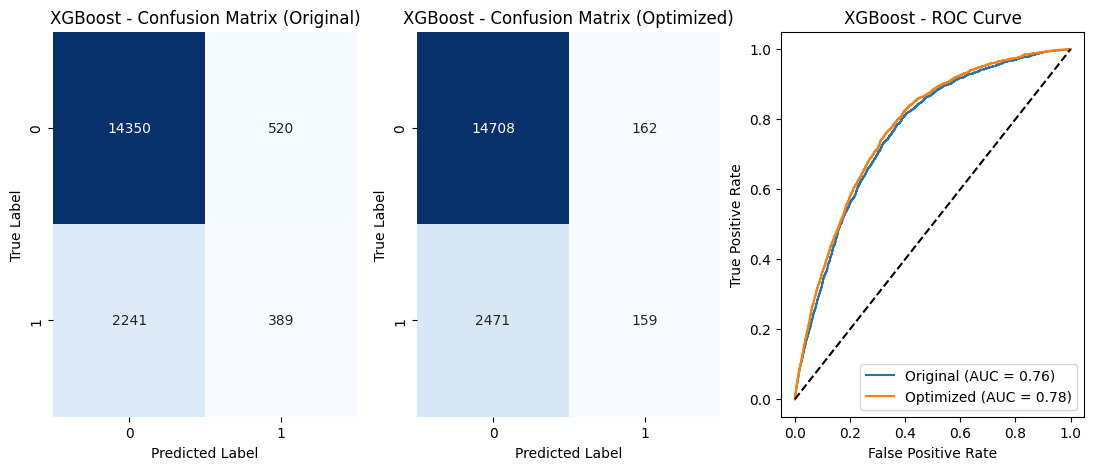

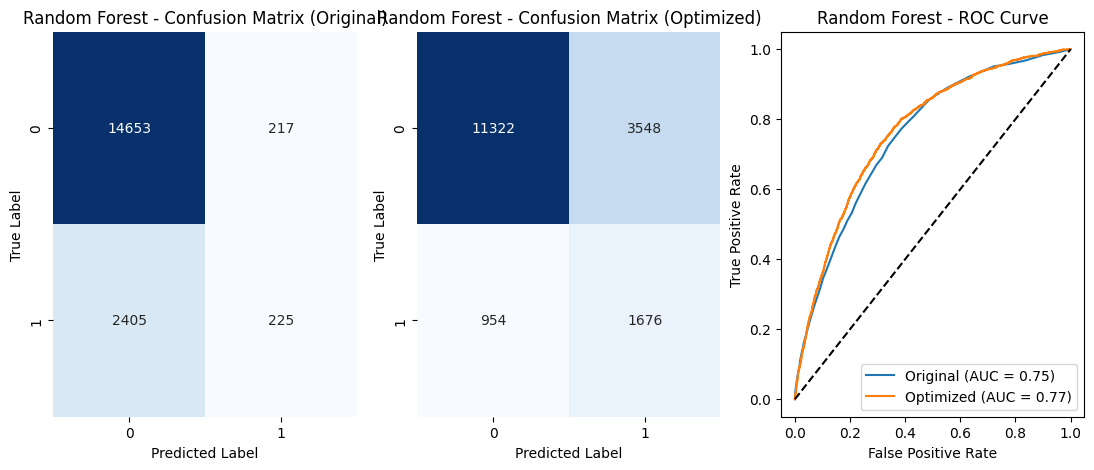

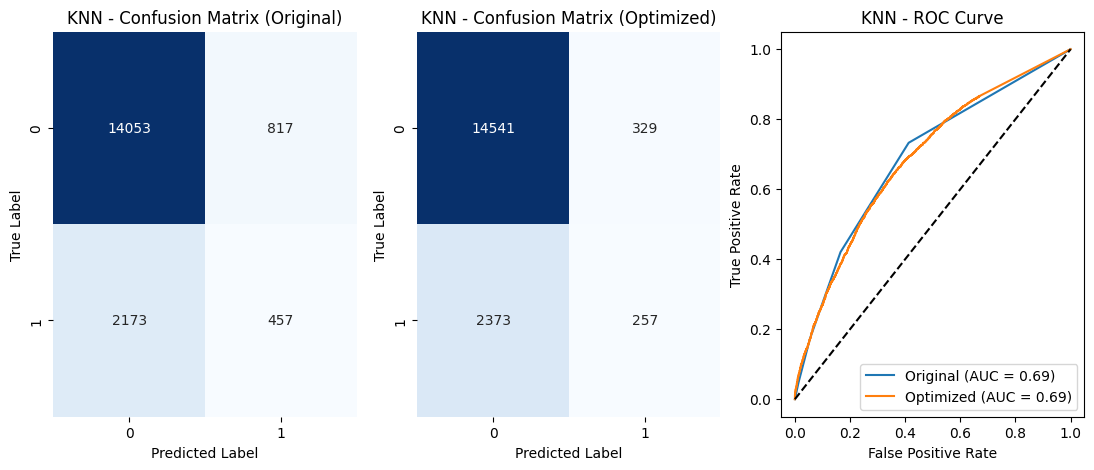

In [ ]:
def plot_confusion_matrix_and_roc(model, model_optimized, X_val, y_val, model_name):
  """Plots the confusion matrix and ROC curve for both the original and optimized model."""

  # Predictions for the original model
  y_pred_original = model.predict(X_val)

  # Predictions for the optimized model
  y_pred_optimized = model_optimized.predict(X_val)

  # Confusion Matrix for the original model
  cm_original = confusion_matrix(y_val, y_pred_original)

  # Confusion Matrix for the optimized model
  cm_optimized = confusion_matrix(y_val, y_pred_optimized)

  # ROC AUC for the original model
  y_proba_original = model.predict_proba(X_val)[:, 1]
  fpr_original, tpr_original, _ = roc_curve(y_val, y_proba_original)
  roc_auc_original = auc(fpr_original, tpr_original)

  # ROC AUC for the optimized model
  y_proba_optimized = model_optimized.predict_proba(X_val)[:, 1]
  fpr_optimized, tpr_optimized, _ = roc_curve(y_val, y_proba_optimized)
  roc_auc_optimized = auc(fpr_optimized, tpr_optimized)

  # Precision-Recall curve for the original model (useful for imbalanced data)
  precision_original, recall_original, _ = precision_recall_curve(y_val, y_proba_original)
  precision_optimized, recall_optimized, _ = precision_recall_curve(y_val, y_proba_optimized)

  # Plotting
  plt.figure(figsize=(18, 5))

  # Confusion Matrix Plot for original model
  plt.subplot(1, 4, 1)
  sns.heatmap(cm_original, annot=True, fmt='d', cmap='Blues', cbar=False)
  plt.title(f"{model_name} - Confusion Matrix (Original)")
  plt.xlabel('Predicted Label')
  plt.ylabel('True Label')

  # Confusion Matrix Plot for optimized model
  plt.subplot(1, 4, 2)
  sns.heatmap(cm_optimized, annot=True, fmt='d', cmap='Blues', cbar=False)
  plt.title(f"{model_name} - Confusion Matrix (Optimized)")
  plt.xlabel('Predicted Label')
  plt.ylabel('True Label')

  # ROC AUC Plot for both models
  plt.subplot(1, 4, 3)
  plt.plot(fpr_original, tpr_original, label=f'Original (AUC = {roc_auc_original:.2f})')
  plt.plot(fpr_optimized, tpr_optimized, label=f'Optimized (AUC = {roc_auc_optimized:.2f})')
  plt.plot([0, 1], [0, 1], 'k--')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title(f"{model_name} - ROC Curve")
  plt.legend(loc='lower right')

plot_confusion_matrix_and_roc(xgb_model, xgb_best_model, X_val, y_val, "XGBoost")
plot_confusion_matrix_and_roc(rfc_model, rfc_best_model, X_val, y_val, "Random Forest")
plot_confusion_matrix_and_roc(knn_model, knn_best_model, X_val, y_val, "KNN")

print("Classification Report for XGBoost (Test):\n", classification_report(y_val, xgb_best_model.predict(X_val)))
print("Classification Report for RFC (Test):\n", classification_report(y_val, rfc_best_model.predict(X_val)))
print("Classification Report for KNN (Test):\n", classification_report(y_val, knn_best_model.predict(X_val)))

plt.show()

## Evaluation best classic model

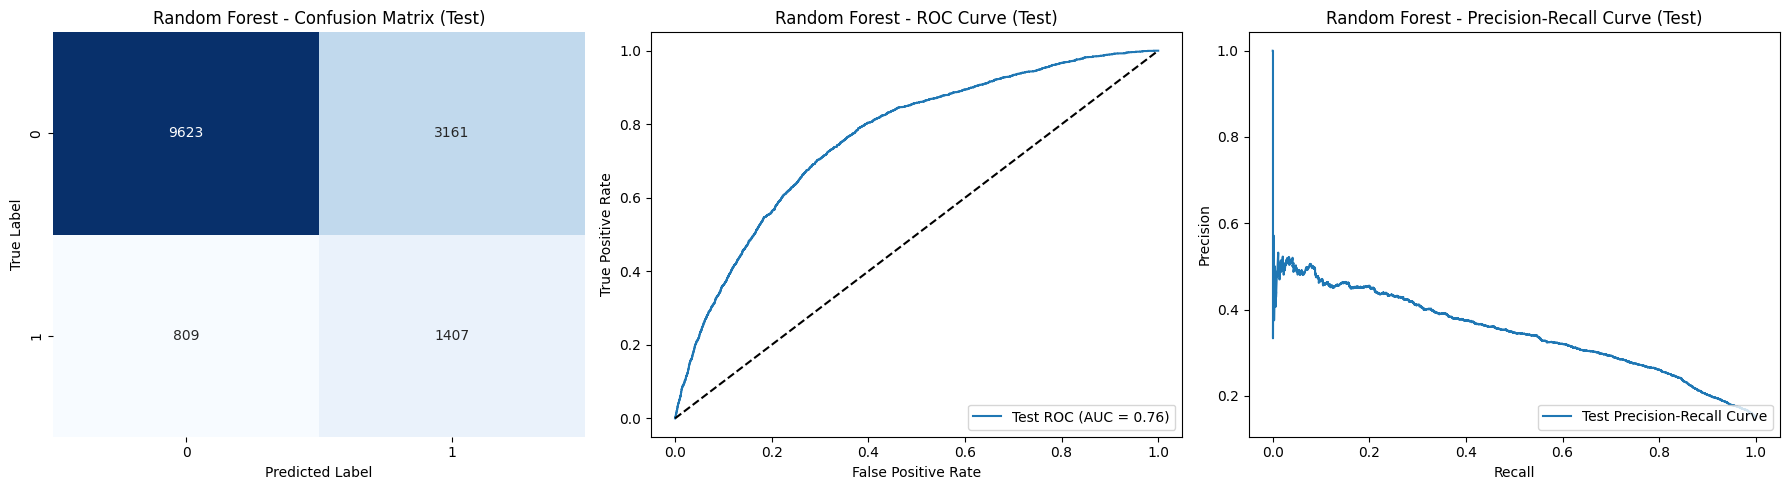

Classification Report for Random Forest (Test):
               precision    recall  f1-score   support

           0       0.92      0.75      0.83     12784
           1       0.31      0.63      0.41      2216

    accuracy                           0.74     15000
   macro avg       0.62      0.69      0.62     15000
weighted avg       0.83      0.74      0.77     15000



In [ ]:
def evaluate_rfc_on_test(model_optimized, X_test, y_test):
    """Évalue le modèle Random Forest optimisé sur le jeu de test et affiche les résultats."""

    # Prédictions pour le modèle optimisé sur le jeu de test
    y_pred_test = model_optimized.predict(X_test)

    # Matrice de confusion pour le modèle optimisé sur le jeu de test
    cm_test = confusion_matrix(y_test, y_pred_test)

    # ROC AUC pour le modèle optimisé sur le jeu de test
    y_proba_test = model_optimized.predict_proba(X_test)[:, 1]
    fpr_test, tpr_test, _ = roc_curve(y_test, y_proba_test)
    roc_auc_test = auc(fpr_test, tpr_test)

    # Courbe Précision-Rappel pour le modèle optimisé (utile pour les données déséquilibrées)
    precision_test, recall_test, _ = precision_recall_curve(y_test, y_proba_test)

    # Plotting
    plt.figure(figsize=(18, 5))

    # Matrice de confusion pour le modèle optimisé
    plt.subplot(1, 3, 1)
    sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title("Random Forest - Confusion Matrix (Test)")
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

    # Courbe ROC AUC pour le modèle optimisé
    plt.subplot(1, 3, 2)
    plt.plot(fpr_test, tpr_test, label=f'Test ROC (AUC = {roc_auc_test:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title("Random Forest - ROC Curve (Test)")
    plt.legend(loc='lower right')

    # Courbe Précision-Rappel
    plt.subplot(1, 3, 3)
    plt.plot(recall_test, precision_test, label='Test Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title("Random Forest - Precision-Recall Curve (Test)")
    plt.legend(loc='lower right')

    plt.tight_layout()
    plt.show()

    # Imprimer le rapport de classification pour des métriques détaillées
    print("Classification Report for Random Forest (Test):\n", classification_report(y_test, y_pred_test))

# Appel de la fonction pour évaluer le modèle optimisé sur l'ensemble de test
evaluate_rfc_on_test(rfc_best_model, X_test, y_test)

                  Feature  Importance
7          booking_origin    0.285130
12              route_dep    0.113832
4          length_of_stay    0.110826
13              route_arr    0.089176
3           purchase_lead    0.088774
11        flight_duration    0.079731
5             flight_hour    0.062881
6              flight_day    0.038759
8     wants_extra_baggage    0.026990
0          num_passengers    0.025153
9    wants_preferred_seat    0.020345
14               clusters    0.019901
10  wants_in_flight_meals    0.018374
1           sales_channel    0.017581
2               trip_type    0.002547


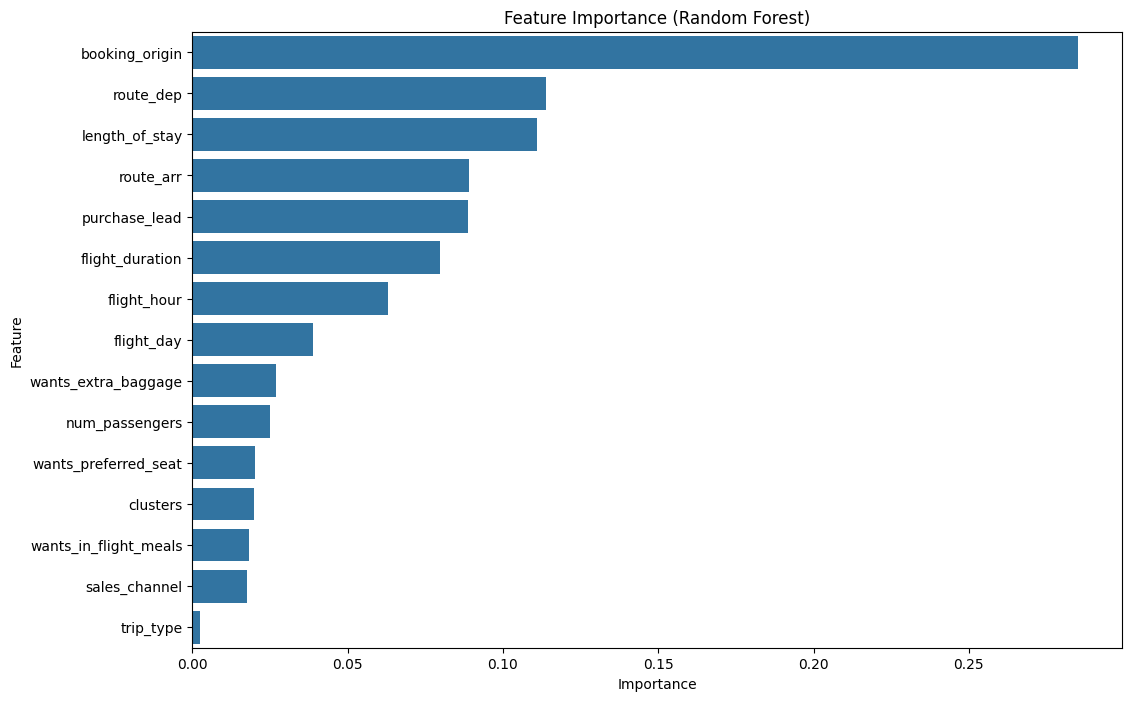

In [ ]:
# Assuming rfc_best_model is your best Random Forest model
feature_importances = rfc_best_model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Display the feature importances
print(feature_importance_df)

# You can also visualize the feature importances using a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


## Neural Networks model

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


547/547 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Modèle simple - Classification Report
              precision    recall  f1-score   support

           0       0.85      1.00      0.92     14870
           1       0.63      0.01      0.02      2630

    accuracy                           0.85     17500
   macro avg       0.74      0.51      0.47     17500
weighted avg       0.82      0.85      0.78     17500

547/547 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


547/547 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
547/547 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Modèle optimisé 1 - Classification Report
              precision    recall  f1-score   support

           0       0.85      1.00      0.92     14870
           1       0.51      0.02      0.04      2630

    accuracy                           0.85     17500
   macro avg       0.68      0.51      0.48     17500
weighted avg       0.80      0.85      0.79     17500

Modèle optimisé 2 - Classification Report
              precision    recall  f1-score   support

           0       0.85      0.99      0.92     14870
           1       0.33      0.03      0.06      2630

    accuracy                           0.85     17500
   macro avg       0.59      0.51      0.49     17500
weighted avg       0.77      0.85      0.79     17500

547/547 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
547/547 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


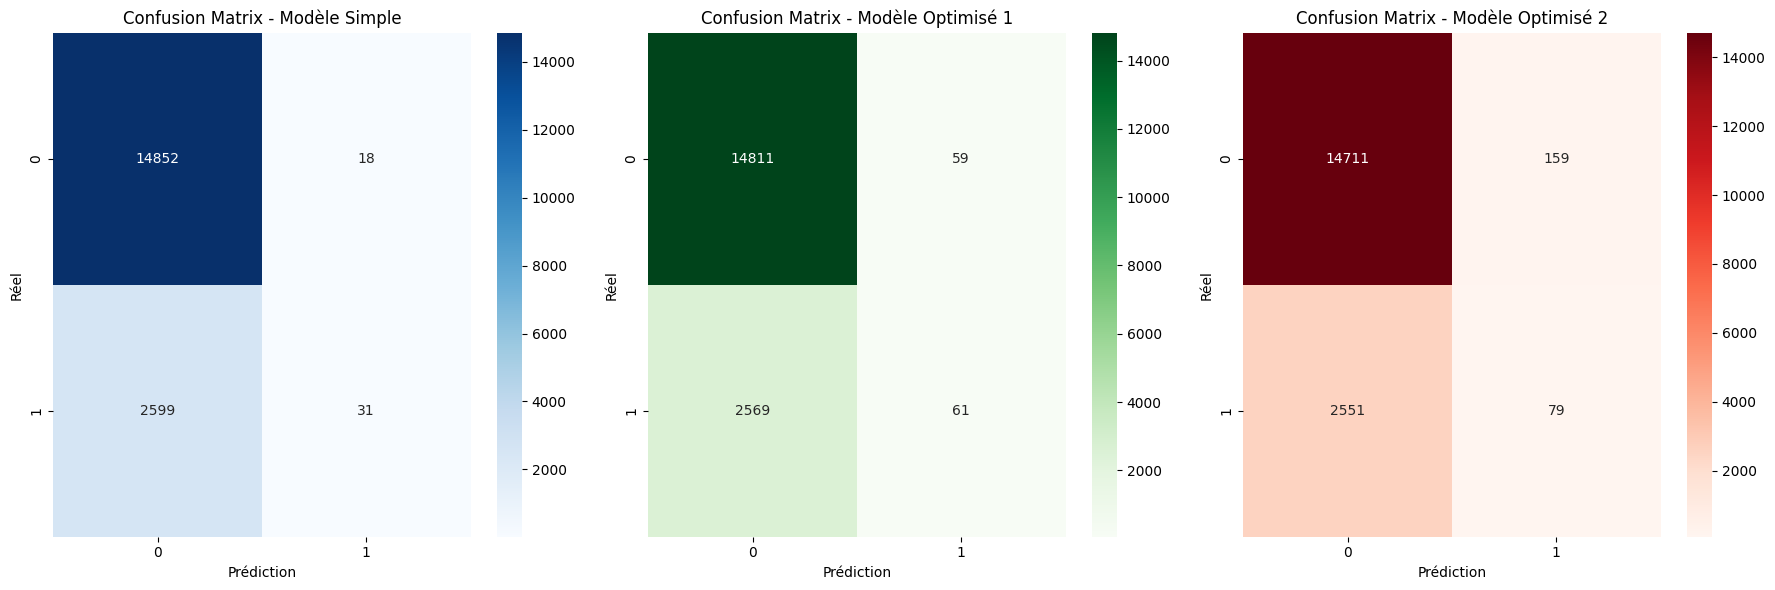

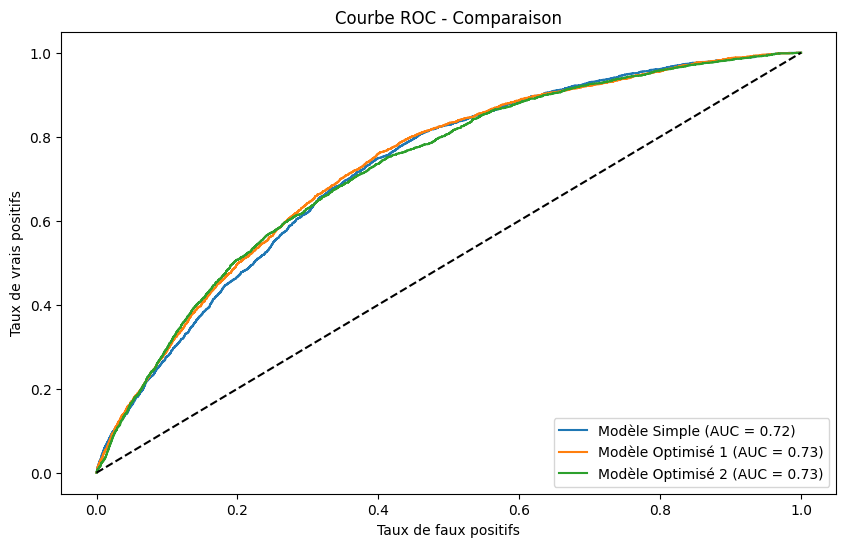

In [ ]:
# Fonction pour créer un modèle simple (non optimisé)
def create_simple_model():
    model = Sequential()
    model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))  # Sigmoid pour la classification binaire
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Créer un modèle simple sans optimisation
simple_model = create_simple_model()

# Entraînement du modèle simple
history_simple = simple_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=32, verbose=0)

# Prédictions avec le modèle simple
y_pred_simple = (simple_model.predict(X_val) > 0.5).astype("int32")

# Évaluation du modèle simple
print("Modèle simple - Classification Report")
print(classification_report(y_val, y_pred_simple))

# Confusion Matrix et ROC pour le modèle simple
cm_simple = confusion_matrix(y_val, y_pred_simple)
y_proba_simple = simple_model.predict(X_val)
fpr_simple, tpr_simple, _ = roc_curve(y_val, y_proba_simple)
roc_auc_simple = auc(fpr_simple, tpr_simple)

# Fonction pour créer un modèle optimisé (avec paramètres modifiables)
def create_optimized_model(optimizer='adam', activation='relu'):
    model = Sequential()
    model.add(Dense(32, input_dim=X_train.shape[1], activation=activation))
    model.add(Dense(16, activation=activation))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# On teste plusieurs modèles optimisés manuellement (sans GridSearchCV)
optimized_model_1 = create_optimized_model(optimizer='adam', activation='relu')
optimized_model_2 = create_optimized_model(optimizer='rmsprop', activation='tanh')

# Entraînement du modèle optimisé 1
history_optimized_1 = optimized_model_1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=32, verbose=0)
y_pred_optimized_1 = (optimized_model_1.predict(X_val) > 0.5).astype("int32")

# Entraînement du modèle optimisé 2
history_optimized_2 = optimized_model_2.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=32, verbose=0)
y_pred_optimized_2 = (optimized_model_2.predict(X_val) > 0.5).astype("int32")

# Evaluation des modèles optimisés
print("Modèle optimisé 1 - Classification Report")
print(classification_report(y_val, y_pred_optimized_1))

print("Modèle optimisé 2 - Classification Report")
print(classification_report(y_val, y_pred_optimized_2))

# Confusion Matrix et ROC pour les modèles optimisés
cm_optimized_1 = confusion_matrix(y_val, y_pred_optimized_1)
y_proba_optimized_1 = optimized_model_1.predict(X_val)
fpr_optimized_1, tpr_optimized_1, _ = roc_curve(y_val, y_proba_optimized_1)
roc_auc_optimized_1 = auc(fpr_optimized_1, tpr_optimized_1)

cm_optimized_2 = confusion_matrix(y_val, y_pred_optimized_2)
y_proba_optimized_2 = optimized_model_2.predict(X_val)
fpr_optimized_2, tpr_optimized_2, _ = roc_curve(y_val, y_proba_optimized_2)
roc_auc_optimized_2 = auc(fpr_optimized_2, tpr_optimized_2)

# Plot Confusion Matrix and ROC Curve for all models
plt.figure(figsize=(18, 6))

# Confusion Matrix - Simple Model
plt.subplot(1, 3, 1)
sns.heatmap(cm_simple, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Modèle Simple")
plt.xlabel('Prédiction')
plt.ylabel('Réel')

# Confusion Matrix - Optimized Model 1
plt.subplot(1, 3, 2)
sns.heatmap(cm_optimized_1, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Modèle Optimisé 1")
plt.xlabel('Prédiction')
plt.ylabel('Réel')

# Confusion Matrix - Optimized Model 2
plt.subplot(1, 3, 3)
sns.heatmap(cm_optimized_2, annot=True, fmt='d', cmap='Reds')
plt.title("Confusion Matrix - Modèle Optimisé 2")
plt.xlabel('Prédiction')
plt.ylabel('Réel')

plt.tight_layout()
plt.show()

# ROC Curve for all models
plt.figure(figsize=(10, 6))
plt.plot(fpr_simple, tpr_simple, label=f'Modèle Simple (AUC = {roc_auc_simple:.2f})')
plt.plot(fpr_optimized_1, tpr_optimized_1, label=f'Modèle Optimisé 1 (AUC = {roc_auc_optimized_1:.2f})')
plt.plot(fpr_optimized_2, tpr_optimized_2, label=f'Modèle Optimisé 2 (AUC = {roc_auc_optimized_2:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title("Courbe ROC - Comparaison")
plt.legend(loc='lower right')
plt.show()